# Scientific Computing Coursework

In [1]:
from My_Functions import solve_toEU,solve_toRK,solve_to
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Initial Value problems

**Eulers Method**: Eulers method is a method used to approximate the solution of an ODE at discrete time intervals. I implemented Eulers Method using a combination of two functions. One function is a 'step' function, calculating the solution of the ODE at a time 'h' forwards in time from the initial provided solution. The second function uses a loop to iterate the step function between times 't1' to 't2'. The following example shows Eulers method approximating the solution to the equation: $$ {\ddot{x}} = x $$  Which is equivalent to the two-dimensional ODE: $$ {\dot{x}} = y $$ $$ {\dot{y}} = -x $$

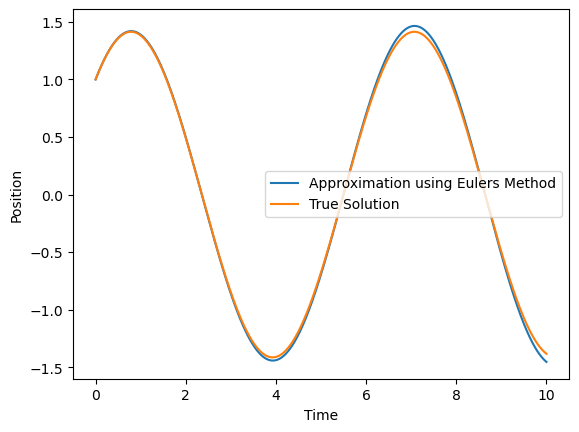

In [2]:
# Numerical approxmation
def ode(t,y): 
    dx_dt = y[1]
    dy_dt = -y[0]
    return [dx_dt, dy_dt]
x0 = [1,1]
t,x = solve_toEU(ode,x0,0,10,0.01)
plt.plot(t,x[:,0], label ='Approximation using Eulers Method')

# True solution
true_solution = x0[0]*np.cos(t) + x0[1]*np.sin(t)
plt.plot(t,true_solution, label ='True Solution')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


**Discussion** 



Demonstrated by the plot above, the function provides an accurate approximation to the true solution provided the step size 'h' is small enough. As h increases, the accuracy of the approximation decreases significantly. To combat this issue i implemented a value error check that raises an error when the step size is larger than a specific value i'd deemed to be a good enough approximation. I implemented a multiple input checks into the function to eliminate any other issues the user may have when using the function, an example of this is demonstrated below, where the initial time input is a negative value:

In [7]:
solve_toEU(ode,x0,-1,10,0.01)

ValueError: Time must be a positive integer

Overall, I think my implementation of this method provides an intuitive solution to Eulers's method, which can be used to approximate solutions to ODEs with an aribtrary number of dimensions in a relatively fast period through the combination of numpy arrays and 'for' loops. The inputs to the function are concise and of an intuitive order, the documentation provides a clear demonstration of how to format the ODE the user would like approximated, and relevant checks are performed to provide the best approximation to the solution required.

**4th Order Runge-Kutta Method**: The Runge-Kutta method is another numerical approximation technique used to approximate the solutions of ODEs at discrete time intervals. The structure of my implementation of this method was similar to the 'solve_toEU' function, combining a step function and a function to iterate the each step through the time domain. Due to the RK method being of higher order than Eulers method, the local error is proportional to the step size raised to a higher power and is therefore generally more accurate at higher step sizes, demonstrated by the code below

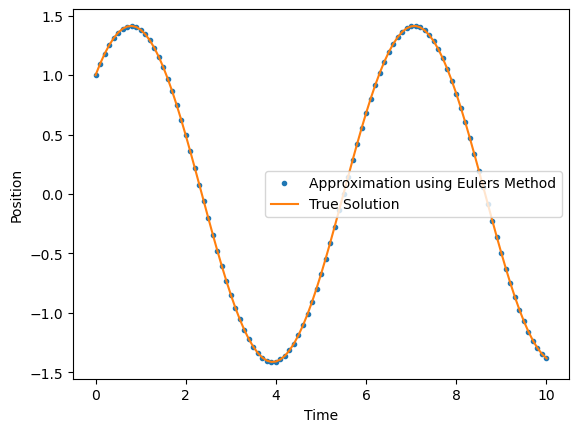

In [10]:
# 
x0 = [1,1]
t,x = solve_toRK(ode,x0,0,10,0.1)
plt.plot(t,x[:,0],'.', label ='Approximation using Eulers Method')

# True solution
true_solution = x0[0]*np.cos(t) + x0[1]*np.sin(t)
plt.plot(t,true_solution, label ='True Solution')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()